# Imports

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import *

# Criando um banco de dados

In [2]:
spark.sql("create database desp")

22/12/13 12:25:53 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
22/12/13 12:25:53 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist
22/12/13 12:25:55 WARN ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
22/12/13 12:25:55 WARN ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore lztv@127.0.1.1
22/12/13 12:25:55 WARN ObjectStore: Failed to get database default, returning NoSuchObjectException
22/12/13 12:25:55 WARN ObjectStore: Failed to get database desp, returning NoSuchObjectException
22/12/13 12:25:55 WARN ObjectStore: Failed to get database desp, returning NoSuchObjectException
22/12/13 12:25:55 WARN ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
22/12/13 12:25:55 WARN ObjectStore: Failed to get database desp, returning NoSuchObjectExcept

DataFrame[]

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
|     desp|
+---------+



## Apontando para o banco criado

In [4]:
spark.sql("use desp")

DataFrame[]

# Puxando os dados 

In [5]:
churn = spark.read.csv("./data/Churn.csv", sep=";", header=True, inferSchema=True)
churn.show()

+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|
|        608|    Spain|Female| 41|     1| 8380786|            1|        0|             1|       11254258|     0|
|        502|   France|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|
|        699|   France|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|
|        850|    Spain|Female| 43|     2|12551082|            1|        1|             1|         790841|     0|
|        645|    Spain|  Male| 44|     8|11375578|            2|        1|             0|       

## Particionando os dados acima de acordo com a Coluna "Geography"

In [6]:
churn.write.partitionBy("Geography").saveAsTable("Churn_Geo")

22/12/13 12:25:57 WARN SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
22/12/13 12:25:57 WARN HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
22/12/13 12:25:57 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
22/12/13 12:25:57 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist


In [7]:
spark.sql("SELECT * FROM Churn_Geo").show(5)

+-----------+------+---+------+--------+-------------+---------+--------------+---------------+------+---------+
|CreditScore|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|Geography|
+-----------+------+---+------+--------+-------------+---------+--------------+---------------+------+---------+
|        619|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|   France|
|        502|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|   France|
|        699|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|   France|
|        822|  Male| 50|     7|       0|            2|        1|             1|         100628|     0|   France|
|        501|  Male| 44|     4|14205107|            2|        0|             1|         749405|     0|   France|
+-----------+------+---+------+--------+-------------+---------+--------------+---------------+-

## Bucketing os dados acima de acordo com a Coluna "Geography"

In [8]:
churn.write.bucketBy(3, "Geography").saveAsTable("Churn_Geo2")

In [9]:
spark.sql("SELECT * FROM Churn_Geo2").show(5)

+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|
|        608|    Spain|Female| 41|     1| 8380786|            1|        0|             1|       11254258|     0|
|        502|   France|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|
|        699|   France|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|
|        850|    Spain|Female| 43|     2|12551082|            1|        1|             1|         790841|     0|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+-------

# Cache e Persist

In [10]:
from pyspark import StorageLevel

In [11]:
arqschema = """id INT, nome STRING, 
               status STRING, 
               cidade STRING, 
               vendas INT, 
               data STRING"""

In [12]:
despachantes = spark.read.csv("./data/despachantes.csv", sep=",", header=False, schema=arqschema)
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [13]:
despachantes.write.saveAsTable("Despachantes")

In [14]:
df = spark.sql("SELECT * FROM despachantes")
df.show(2)

+---+----------------+------+-------------+------+----------+
| id|            nome|status|       cidade|vendas|      data|
+---+----------------+------+-------------+------+----------+
|  1|Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2| Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
+---+----------------+------+-------------+------+----------+
only showing top 2 rows



In [15]:
df.storageLevel

StorageLevel(False, False, False, False, 1)

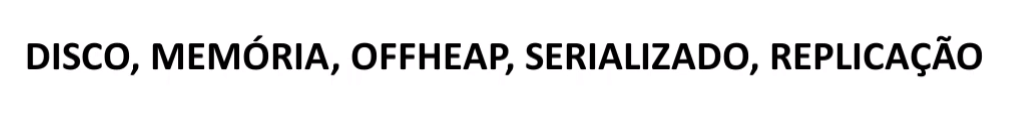

In [16]:
df.cache()

DataFrame[id: int, nome: string, status: string, cidade: string, vendas: int, data: string]

In [17]:
df.storageLevel

StorageLevel(True, True, False, True, 1)

In [18]:
df.persist(StorageLevel.DISK_ONLY)

22/12/13 12:27:39 WARN CacheManager: Asked to cache already cached data.


DataFrame[id: int, nome: string, status: string, cidade: string, vendas: int, data: string]

In [19]:
df.storageLevel

StorageLevel(True, True, False, True, 1)

In [20]:
df.unpersist()

DataFrame[id: int, nome: string, status: string, cidade: string, vendas: int, data: string]

In [21]:
df.persist(StorageLevel.DISK_ONLY)

DataFrame[id: int, nome: string, status: string, cidade: string, vendas: int, data: string]

In [22]:
df.storageLevel

StorageLevel(True, False, False, False, 1)